# 图像基础数学工具


In [1]:
# 调包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2  #opencv默认读取的格式是BGR

In [2]:
print (cv2.getVersionString())

4.8.1


In [3]:
# 读取图片
path = '/Users/yungpinghu/Downloads/galaxy.jpeg'
orign = cv2.imread(path)

# H-height;W-width;C-通道数
orign.shape

(406, 587, 3)

## 算术运算
- s(x, y) = f(x, y)+g(x, y) 
- d(x, y) = f(x, y)-g(x, y) 
- p(x, y) = f(x, y)×g(x, y) 
- v(x, y) = f(x, y)÷g(x, y)



### 图像相加求平均去噪

In [4]:
# 转换为浮点型
img = orign.astype(np.float32)

# 相加求平均
accumulator = np.zeros_like(img, dtype=np.float32)
for _ in range(100):
    accumulator += img
average = accumulator / 100

# 将浮点结果转换回无符号整型
average_image = np.clip(average, 0, 255).astype('uint8')


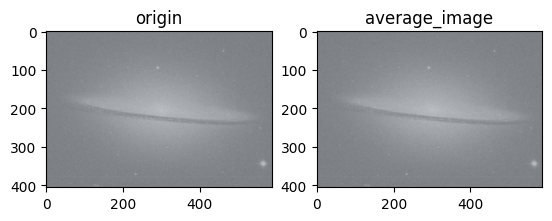

In [5]:
orign = cv2.cvtColor(orign, cv2.COLOR_BGR2RGB)
average_image = cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB)
imgs = [orign, average_image]
titles = ['origin', 'average_image']
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(imgs[i])
plt.show()

### 图像相减比较图像

In [6]:
# 导入图像
path1 = '/Users/yungpinghu/Downloads/DIP3E_Original_Images_CH02/Fig0228(a)(angiography_mask_image).tif'
path2 = '/Users/yungpinghu/Downloads/DIP3E_Original_Images_CH02/Fig0228(b)(angiography_live_ image).tif'
image1 = cv2.imread(path1)
image2 = cv2.imread(path2)

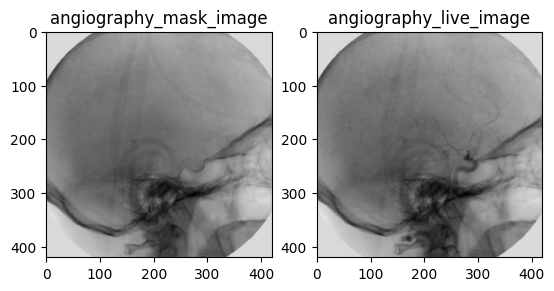

In [7]:
# 显示原图
imgs = [image1, image2]
titles = ['angiography_mask_image', 'angiography_live_image']
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(imgs[i])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


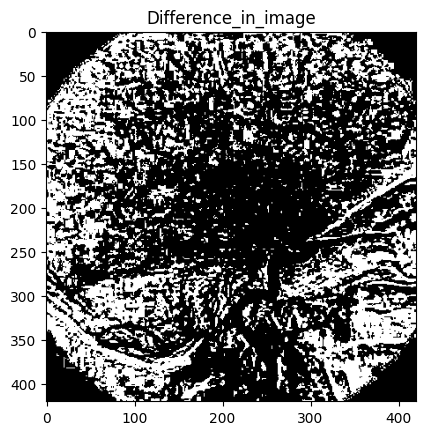

In [8]:
# 转换为浮点型
image1 = image1.astype(np.float32)
image2 = image2.astype(np.float32)
# 图像差值
subtracted_image = image2 - image1
plt.title('Difference_in_image')
plt.imshow(subtracted_image)
plt.show()

### 使用图像相乘/相除校正阴影和模板

In [9]:
# 导入图片
path1 = '/Users/yungpinghu/Desktop/1.png'
path2 = '/Users/yungpinghu/Desktop/2.png'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

In [10]:
# 获取形状信息
height1, width1, _ = img1.shape
height2, width2, _ = img2.shape

# 确保形状一致
resized_image1 = cv2.resize(img1, (width2, height2))

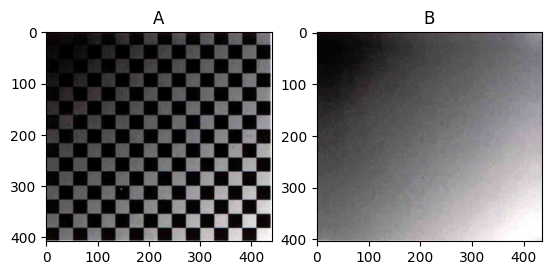

In [11]:
# 原图展示
imgs = [img1, img2]
titles = ['A', 'B']
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(imgs[i])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


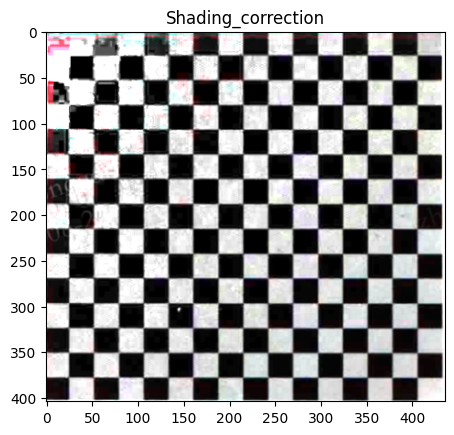

In [14]:
# 阴影校正
inverse_image2 = 1.0 / img2.astype(np.float32)
result_image = resized_image1.astype(np.float32) * inverse_image2

plt.title('Shading_correction')
plt.imshow(result_image)
plt.show()

In [17]:
# 导入图片
path1 = '/Users/yungpinghu/Downloads/DIP3E_Original_Images_CH02/Fig0230(a)(dental_xray).tif'
path2 = '/Users/yungpinghu/Downloads/DIP3E_Original_Images_CH02/Fig0230(b)(dental_xray_mask).tif'
img1 = cv2.imread(path1)
mask = cv2.imread(path2)

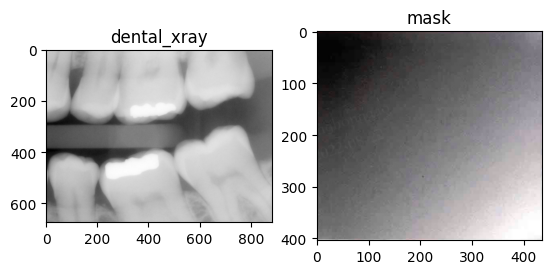

In [18]:
# 原图展示
imgs = [img1, img2]
titles = ['dental_xray', 'mask']
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(imgs[i])
plt.show()

In [15]:
# 转换为同一数据类型
roi = img1.copy()
roi[np.where(mask==0)] = 0

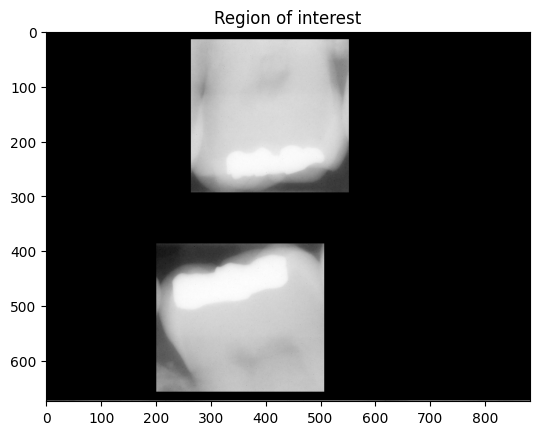

In [16]:
plt.title('Region of interest')
plt.imshow(roi)
plt.show()

## 集合运算和逻辑运算

In [17]:
# 图像导入
image = cv2.imread('/Users/yungpinghu/Downloads/DIP3E_Original_Images_CH02/Fig0232(a)(partial_body_scan).tif')

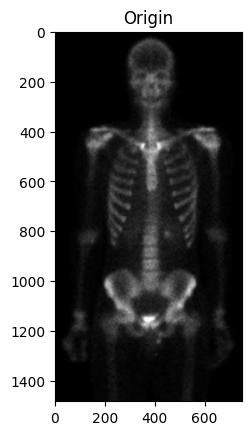

In [18]:
# 显示原图像
plt.title('Origin')
plt.imshow(image)
plt.show()

In [19]:
# 计算补集图像
complement_image = cv2.bitwise_not(image)

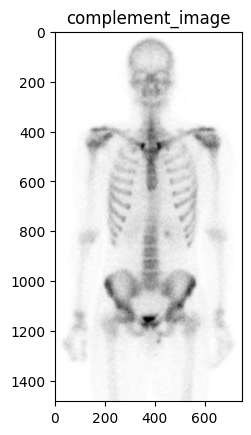

In [20]:
# 显示补集图像
plt.title('complement_image')
plt.imshow(complement_image)
plt.show()

## 空间运算
- 单像素运算
- 领域运算
- 几何空间运算